In [1]:
from src.compute_objectives import *
from src.functions import *

Population de départ :  [{0: 2, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 2, 7: 0, 8: 2, 9: 2, 10: 2, 11: 0, 12: 1, 13: 1, 14: 0}, {0: 1, 1: 2, 2: 1, 3: 1, 4: 2, 5: 0, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 1, 12: 1, 13: 2, 14: 2}, {0: 0, 1: 2, 2: 2, 3: 0, 4: 1, 5: 2, 6: 0, 7: 2, 8: 2, 9: 0, 10: 2, 11: 2, 12: 2, 13: 2, 14: 0}, {0: 1, 1: 2, 2: 2, 3: 2, 4: 1, 5: 0, 6: 2, 7: 0, 8: 0, 9: 2, 10: 0, 11: 1, 12: 0, 13: 2, 14: 0}, {0: 1, 1: 0, 2: 1, 3: 2, 4: 2, 5: 1, 6: 1, 7: 2, 8: 2, 9: 1, 10: 2, 11: 2, 12: 1, 13: 0, 14: 2}, {0: 2, 1: 1, 2: 1, 3: 1, 4: 0, 5: 0, 6: 2, 7: 0, 8: 1, 9: 2, 10: 1, 11: 2, 12: 1, 13: 0, 14: 0}, {0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 0, 13: 0, 14: 2}, {0: 1, 1: 1, 2: 0, 3: 2, 4: 0, 5: 0, 6: 2, 7: 1, 8: 0, 9: 1, 10: 1, 11: 1, 12: 1, 13: 0, 14: 1}, {0: 2, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 2, 7: 2, 8: 2, 9: 2, 10: 0, 11: 2, 12: 0, 13: 2, 14: 1}, {0: 1, 1: 2, 2: 1, 3: 1, 4: 0, 5: 2, 6: 1, 7: 0, 8: 2, 9: 1, 10: 2, 11: 0, 12: 2, 13: 2, 14: 1}]


ValueError: num must be 1 <= num <= 6, not 7

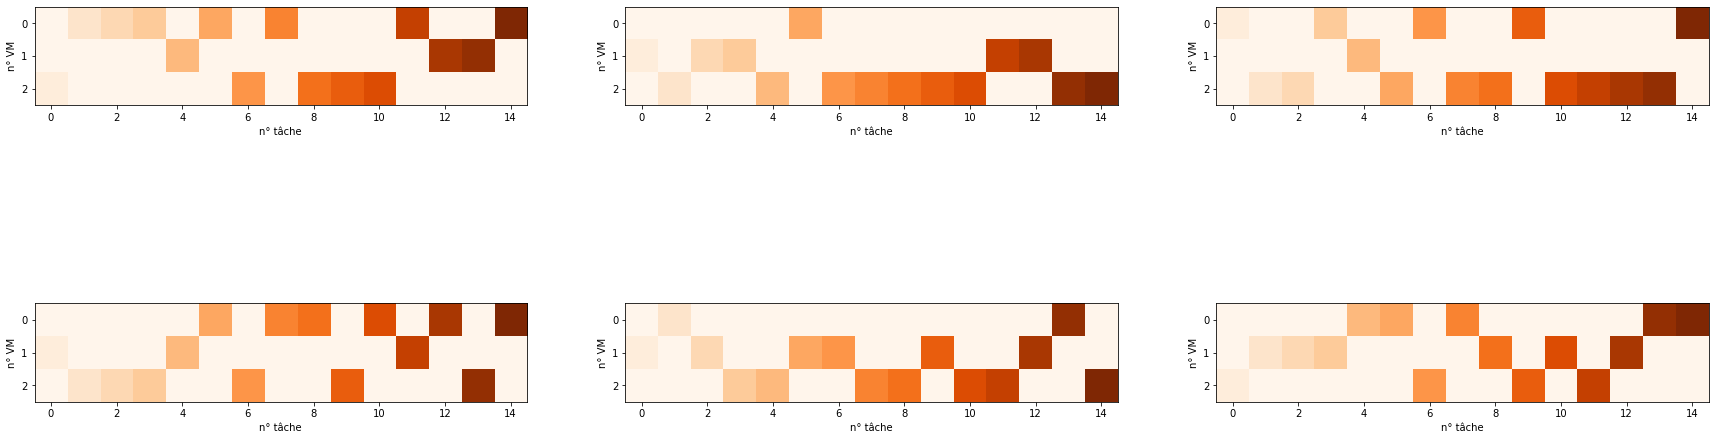

In [2]:
### Algorithme NSGA II

CRITERE_ARRET = 100

# Initialisation de la population de départ
population_depart = create_start_population()
print("Population de départ : ", population_depart)
display_pop(population_depart)

print(
    "Evaluation de la population de départ :\n", evaluate_population(population_depart)
)

# Entrée dans la boucle
for i in range(CRITERE_ARRET):
    # print("\n____ Debut de la boucle ", i)
    # Evaluation de la population
    score = evaluate_population(population_depart)

    # Rang
    rank = ranking(score)
    # print("Rang de la population de départ : ", score)

    ### Child population - début
    selected_solution = selection(population_depart, rank)
    # print("Population sélectionnée : ", selected_solution)

    # Crossover
    crossed_population = crossover(selected_solution)

    # Mutation
    mutated_population = mutation(crossed_population)
    # print("Population enfant : ", mutated_population)
    ### Child population - fin

    # Combinaison des populations
    combined_population = population_depart + mutated_population

    selected_elite_population = elitism_selection(10, combined_population)
    # print("Elite population : ", selected_elite_population)

    # La population elite devient la nouvelle population de départ
    population_depart = selected_elite_population

print("\nPopulation finale : ", selected_elite_population)
display_pop(selected_elite_population)
print(
    "Evaluation de la population finale :\n",
    evaluate_population(selected_elite_population),
)